In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [158]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")


In [159]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [160]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [161]:
df_fake["label"] = "FAKE"
df_true["label"] = "TRUE"
df_true.head(5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [162]:
df_fake.shape, df_true.shape


((23481, 5), (21417, 5))

In [163]:
df_combine = pd.concat([df_fake, df_true], axis =0 )
df_combine.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",FAKE
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",FAKE
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",FAKE
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",FAKE
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",FAKE


In [164]:
df_combine.columns


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [165]:
df = df_combine.drop(["text", "subject","date"], axis = 1)
df.head()

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,FAKE


In [166]:
df.isnull().sum()

title    0
label    0
dtype: int64

In [167]:
df = df.sample(frac = 1)  
print(df)

                                                   title label
491     Disgusting Trump Is Using Hurricane As An Opp...  FAKE
20462  B*TCH OF BENGHAZI WINS Democrat Nomination” I’...  FAKE
17377  Islamic State claims two rockets fired from Si...  TRUE
1098    Embarrassing: Watch Trump Attorney Gets Grill...  FAKE
3871   U.S. Republican Graham curious on Trump busine...  TRUE
...                                                  ...   ...
10052  DEMOCRAT LEGAL EXPERT Shocks The Left With His...  FAKE
9398   State Department was not doing enough on email...  TRUE
15916  LAWYER FOR FBI INFORMANT Knows of Russian Brib...  FAKE
3936   U.S. House passes bill to fund government thro...  TRUE
19696  BREAKING: OBAMA APPOINTED JUDGE Demands RNC Re...  FAKE

[44898 rows x 2 columns]


In [168]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
print(df)

                                                   title label
0       Disgusting Trump Is Using Hurricane As An Opp...  FAKE
1      B*TCH OF BENGHAZI WINS Democrat Nomination” I’...  FAKE
2      Islamic State claims two rockets fired from Si...  TRUE
3       Embarrassing: Watch Trump Attorney Gets Grill...  FAKE
4      U.S. Republican Graham curious on Trump busine...  TRUE
...                                                  ...   ...
44893  DEMOCRAT LEGAL EXPERT Shocks The Left With His...  FAKE
44894  State Department was not doing enough on email...  TRUE
44895  LAWYER FOR FBI INFORMANT Knows of Russian Brib...  FAKE
44896  U.S. House passes bill to fund government thro...  TRUE
44897  BREAKING: OBAMA APPOINTED JUDGE Demands RNC Re...  FAKE

[44898 rows x 2 columns]


In [169]:
def removeRegularExp(text): #regular expression
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text) #remove fullstop
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [170]:

df["title"] = df["title"].apply(removeRegularExp)


In [171]:
x = df["title"]
y = df["label"]
print(x)

0         disgusting trump is using hurricane as an opp...
1        b tch of benghazi wins democrat nomination  i ...
2        islamic state claims two rockets fired from si...
3         embarrassing  watch trump attorney gets grill...
4        u s  republican graham curious on trump busine...
                               ...                        
44893    democrat legal expert shocks the left with his...
44894    state department was not doing enough on email...
44895    lawyer for fbi informant knows of russian brib...
44896    u s  house passes bill to fund government thro...
44897    breaking  obama appointed judge demands rnc re...
Name: title, Length: 44898, dtype: object


<AxesSubplot:>

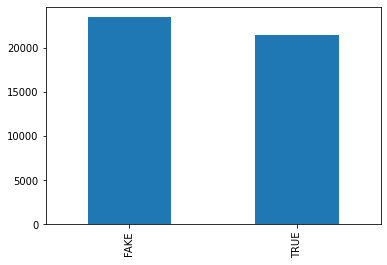

In [172]:
df['label'].value_counts().plot(kind = 'bar')

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 0) 

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [175]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train) #total terms: nXn matrix  
xv_test = vectorization.transform(x_test)

In [176]:
y_train.head()

13637    FAKE
42421    TRUE
37916    FAKE
3321     FAKE
2345     FAKE
Name: label, dtype: object

In [177]:
from sklearn.linear_model import LogisticRegression



In [178]:
Lr=LogisticRegression()
Lr.fit(xv_train,y_train)


LogisticRegression()

In [179]:
predic_Lr=Lr.predict(xv_test)

In [180]:
accuracy = Lr.score(xv_test, y_test)
print(accuracy*100)

95.21603563474387


In [181]:
from sklearn.naive_bayes import MultinomialNB


Nb = MultinomialNB()
Nb.fit(xv_train, y_train)
accuracy = Nb.score(xv_test, y_test)

print(accuracy*100)

94.21826280623607


In [182]:
from sklearn.tree import DecisionTreeClassifier


Dt = DecisionTreeClassifier()
Dt.fit(xv_train, y_train)
accuracy = Dt.score(xv_test, y_test)

print(accuracy*100)

90.87750556792872


In [183]:
# PASSIVE-AGGRESSIVE CLASSIFIER

from sklearn.metrics import accuracy_score

from sklearn.linear_model import PassiveAggressiveClassifier

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(xv_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(xv_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy*100)

95.0467706013363


In [184]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(random_state=0)
Rfc.fit(xv_train, y_train)
predict_Rfc = Rfc.predict(xv_test)
accuracy = Rfc.score(xv_test, y_test)

print(accuracy*100)

95.38530066815144


In [185]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(xv_train,y_train)
y_pred=clf.predict(xv_test)
accuracy=accuracy_score(y_test,y_pred)

print(accuracy*100)

95.84855233853007


In [186]:
import pickle

with open("modal",'wb') as f:
    pickle.dump(clf,f)